In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os 
pwd = os.getcwd()

path = os.path.join(pwd,"img")
filepath = os.path.join(path,"lena.png")

lena = plt.imread(filepath)

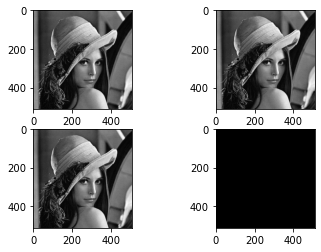

In [85]:
lena.shape

for n in range(4):
    plt.subplot(2,2,n+1)
    plt.imshow( lena[:,:,n], cmap="gray" )


Text(0.5, 1.0, 'difference entre canaux 0.0')

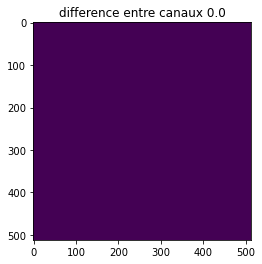

In [86]:
x = lena[:,:,0] - lena[:,:,1]
plt.imshow(x)
plt.title("difference entre canaux {}".format(np.sum(x)))

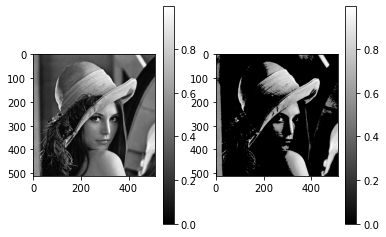

In [87]:
lena_g = lena[:,:,0]

plt.subplot(121)
plt.imshow(lena_g, cmap="gray")
plt.colorbar()

plt.subplot(122)
plt.imshow((lena_g>.5)*lena_g, cmap="gray")
plt.colorbar()

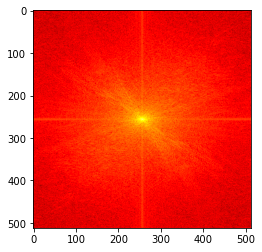

In [88]:
lena_spectre = np.abs( np.fft.fft2(lena_g) ) ** 2 

plt.imshow(np.log(np.fft.fftshift(lena_spectre)), cmap="hot")


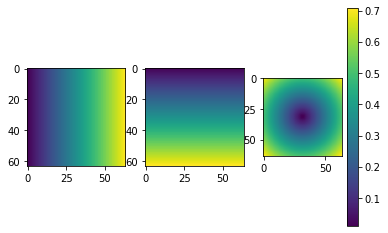

In [89]:
N = 64
vx = np.linspace(0,1,N)
vy = np.linspace(0,1,N)

xx,yy = np.meshgrid(vx,vy)

r = np.sqrt( (xx-.5)**2 + (yy-.5)**2  )

plt.subplot(131)
plt.imshow(xx)

plt.subplot(132)
plt.imshow(yy)

plt.subplot(133)
plt.imshow(r)
plt.colorbar()

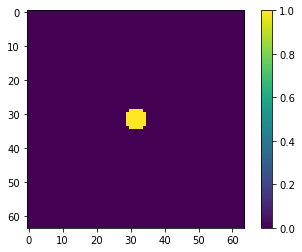

In [90]:
disque = r < .05

plt.imshow(disque)
plt.colorbar()

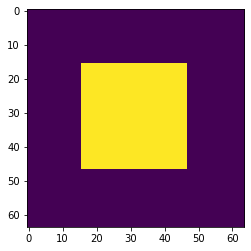

In [91]:
carre = np.ones((64,64))
carre[:16,:] = 0 
carre[47:,:] = 0 
carre[:,:16] = 0 
carre[:,47:] = 0 

plt.imshow(carre)

In [92]:
carre.shape

(64, 64)

In [93]:
N2 = 512
tf_lena = np.fft.fft2( lena_g/lena_g.sum() , (N2,N2))
tf_filtre = np.fft.fft2( disque/disque.sum(), (N2,N2))
tf_carre = np.fft.fft2( carre/carre.sum(), (N2,N2))


<ipython-input-94-dfc12a71e2f9>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log( np.fft.fftshift(np.abs(tf_filtre)**2)))


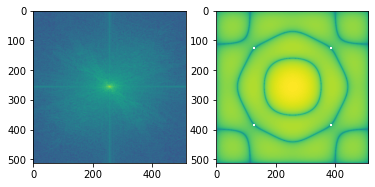

In [94]:
plt.subplot(121)
plt.imshow(np.log( np.fft.fftshift(np.abs(tf_lena)**2)))

plt.subplot(122)
plt.imshow(np.log( np.fft.fftshift(np.abs(tf_filtre)**2)))


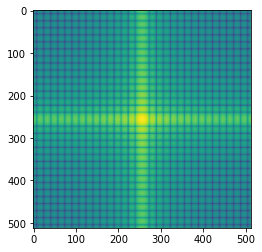

In [95]:
plt.imshow(np.log( np.fft.fftshift(np.abs(tf_carre)**2)))

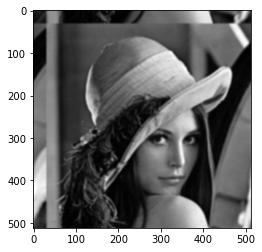

In [96]:

out = np.real( np.fft.ifft2( tf_lena * tf_filtre )) 

plt.imshow(out, cmap="gray")



In [98]:
def filtrage(x,y):
    xx,yy = x.shape
    TFX = np.fft.fft2(x, s=(xx,yy))
    TFY = np.fft.fft2(y, s=(xx,yy))

    return np.real( np.fft.ifft2( TFX * TFY ))

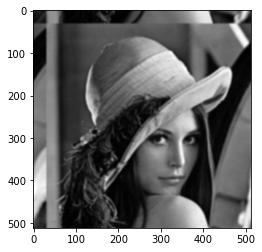

In [99]:
out = filtrage(lena_g, disque)

plt.imshow(out, cmap="gray")

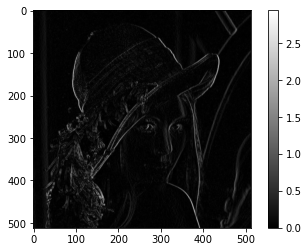

In [109]:
dx = [[1,0,-1],[1,0,-1],[1,0,-1]]



out2 = filtrage( lena_g, dx) 

plt.imshow(np.abs( out2), cmap="gray")
plt.colorbar()

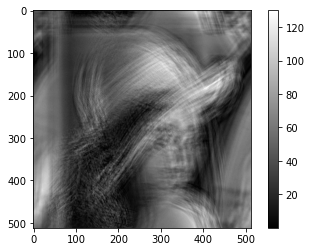

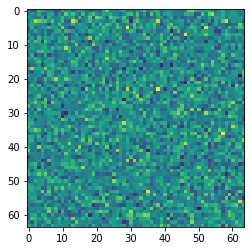

In [127]:
dirt = np.random.randn(64,64)

out3 = filtrage( lena_g, dirt) 


plt.imshow(np.abs( out3), cmap="gray")
plt.colorbar()
dirt 

plt.figure()
plt.imshow(dirt)

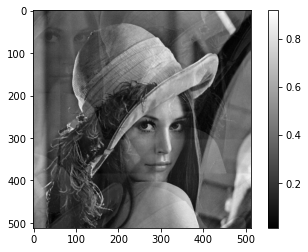

In [141]:
echo = np.zeros((512,512))
echo[256,256] = 5 
echo[48,32] = 1 
echo[128,320] = 1

echo /= echo.sum()
echo = np.fft.fftshift(echo)
outecho = filtrage( lena_g, echo) 


plt.imshow(np.abs( outecho), cmap="gray")
plt.colorbar()

